In [1]:
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.tree import plot_tree
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
df = pd.read_csv("telematik_agg_v2.csv")
df = df.drop(columns=["Unnamed: 0"])
y = df["driving_skill"]
X = df.drop(columns=["driving_skill", "rel_risk"])
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

#ages = X[["DrivAge"]]
accels = X[["max_accel_x", "min_accel_x", "max_accel_y", "min_accel_y"]]
speeds = X[["max_speed_mw", "max_speed_urban", "max_speed_rural"]]
streetTypes = X[["ratio_mw", "ratio_urban", "ratio_rural", "ratio_night", "ratio_precip", "ratio_rush"]]
fourAccels = X[["four_accel_1", "four_accel_2", "four_accel_3", "four_accel_4"]]

#age_clusters = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(ages)
accelClusters = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(accels)
speedClusters = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(speeds)
streetClusters = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(streetTypes)
fourAccelClusters = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(fourAccels)

clusters = pd.DataFrame({
    "accel_cluster": accelClusters.labels_,
    "speed_cluster": speedClusters.labels_,
    "street_cluster": streetClusters.labels_,
    "four_accel_cluster": fourAccelClusters.labels_
})

In [3]:
df

,Unnamed: 0.1,DrivAge,rel_risk,Mileage,max_accel_x,min_accel_x,max_accel_y,min_accel_y,max_speed_mw,max_speed_urban,...,ratio_urban,ratio_rural,ratio_night,ratio_precip,ratio_rush,four_accel_1,four_accel_2,four_accel_3,four_accel_4,driving_skill
0,0,52,0.025511,6235.337875,4.270571,-3.186554,2.236002,-1.696633,139.580307,131.528249,...,0.234289,0.617811,0.159878,0.182537,0.065222,2.470029,0.000814,82.928661,3782.818447,3
1,1,38,0.093298,2520.900336,1.787043,-3.118378,2.129723,-1.241005,157.229086,136.481766,...,0.348099,0.493600,0.162678,0.153850,0.138712,-3.454407,0.404569,30.738335,496.235516,5
2,2,44,0.119460,14136.719210,4.403333,-3.074536,2.512433,-1.387016,166.693425,136.615064,...,0.226000,0.640880,0.161343,0.200200,0.180049,-25.788232,3.060334,157.741334,3917.657266,5
3,3,32,0.023914,7718.314400,0.481826,-3.012558,1.783253,-2.248576,136.874746,131.570166,...,0.225024,0.619133,0.151244,0.165610,0.365876,2.066236,79.250061,174.778169,2958.453923,3
4,4,73,0.108091,3495.908846,14.967886,-2.792939,2.182035,-1.979150,164.069706,135.150505,...,0.196956,0.648112,0.156745,0.114058,0.000403,10.282886,0.000067,28.245054,792.581652,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135598,135598,73,0.000535,3315.564527,7.700320,-3.007404,1.750491,-2.603303,130.062076,130.031220,...,0.272801,0.579201,0.138606,0.137713,0.148721,1.504315,7.469996,31.610984,4000.000000,1
135599,135599,31,0.001505,12722.839668,8.976010,-2.935883,2.088378,-1.687036,130.413221,130.076197,...,0.244380,0.593041,0.138271,0.139825,0.137743,0.577229,0.024393,81.806134,3388.377824,1
135600,135600,56,0.000287,0.000000,6.936267,-3.088976,2.036627,-2.301296,130.125427,130.002631,...,0.230065,0.614631,0.145710,0.149470,0.186812,0.100227,4.706343,34.094390,3095.070112,1
135601,135601,64,0.000999,2848.137256,4.688229,-2.988925,1.731109,-2.102254,130.239871,130.076431,...,0.185419,0.660699,0.155243,0.137025,0.283110,10.644096,53.399836,124.230700,3639.668664,1


In [4]:


lda = LatentDirichletAllocation(n_components=4)
topics = lda.fit_transform(clusters)


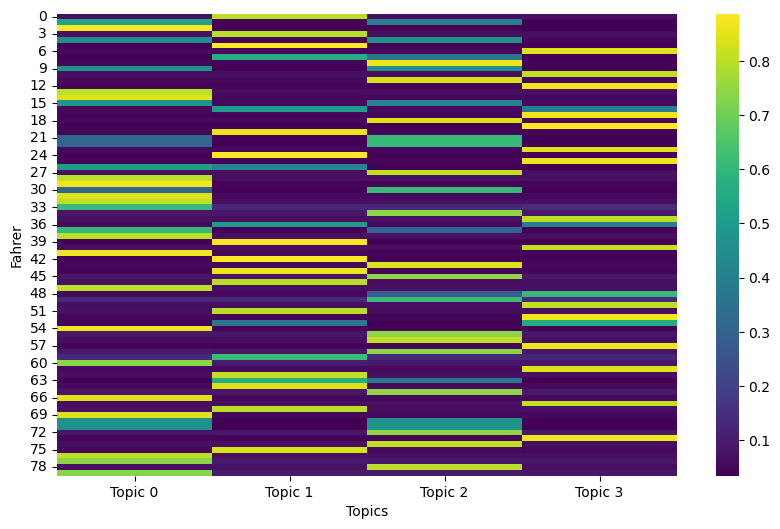

In [5]:
topics_df = pd.DataFrame(
    topics,
    columns=[f"Topic {i}" for i in range(topics.shape[1])]
)

plt.figure(figsize=(10, 6))
sns.heatmap(topics_df.head(80), cmap="viridis")
plt.xlabel("Topics")
plt.ylabel("Fahrer")
plt.show()